In [3]:
import os
import numpy as np
from python_speech_features import mfcc
from scipy.io import wavfile
from scipy import spatial
import matplotlib.pyplot as plt

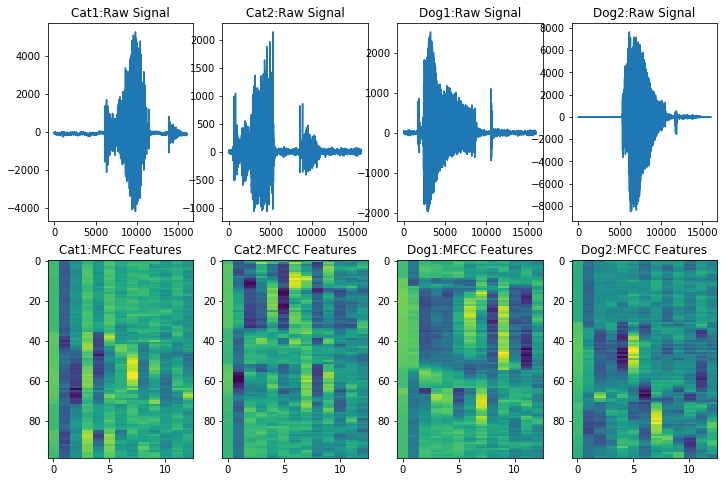

In [4]:
dataset_path = './speech_dataset/'
cat1= './speech_dataset/cat/004ae714_nohash_0.wav'
cat2 = './speech_dataset/cat/00f0204f_nohash_1.wav'
dog1 = './speech_dataset/dog/00f0204f_nohash_1.wav'
dog2 = './speech_dataset/dog/03c96658_nohash_0.wav'


#raw signals
rate1, signal1 = wavfile.read(cat1)
rate2, signal2 = wavfile.read(cat2)
rate3, signal3 = wavfile.read(dog1)
rate4, signal4 = wavfile.read(dog2)

#mfcc
mfcc_cat1 = mfcc(signal1, rate1)
mfcc_cat2 = mfcc(signal2, rate2)
mfcc_dog1 = mfcc(signal3, rate3)
mfcc_dog2 = mfcc(signal4, rate4)

##View raw signal
fig, ax = plt.subplots(2,4)
fig.set_size_inches(12,8)
fig.set_facecolor('w')

#Cat1
ax[0,0].plot(signal1)
ax[0,0].set_title("Cat1:Raw Signal")
ax[1,0].imshow(mfcc_cat1, aspect='auto')
ax[1,0].set_title("Cat1:MFCC Features")

#Cat2
ax[0,1].plot(signal2)
ax[0,1].set_title("Cat2:Raw Signal")
ax[1,1].imshow(mfcc_cat2, aspect='auto')
ax[1,1].set_title("Cat2:MFCC Features")

#Dog1
ax[0,2].plot(signal3)
ax[0,2].set_title("Dog1:Raw Signal")
ax[1,2].imshow(mfcc_dog1, aspect='auto')
ax[1,2].set_title("Dog1:MFCC Features")

#Dog2
ax[0,3].plot(signal4)
ax[0,3].set_title("Dog2:Raw Signal")
ax[1,3].imshow(mfcc_dog2, aspect='auto')
ax[1,3].set_title("Dog2:MFCC Features")

plt.show()

In [5]:
def sum_convolution(feats_1, feats_2):
    return sum(np.convolve(feats_1, feats_2))

In [6]:
def max_convolution(feats_1, feats_2):
    return max(np.convolve(feats_1, feats_2))

In [7]:
def cosine_distance(feats_1, feats_2):
    dist = []
    for i in range(len(feats_1)):
        dist.append(spatial.distance.cosine(feats_1[i], feats_2[i]))
    return dist

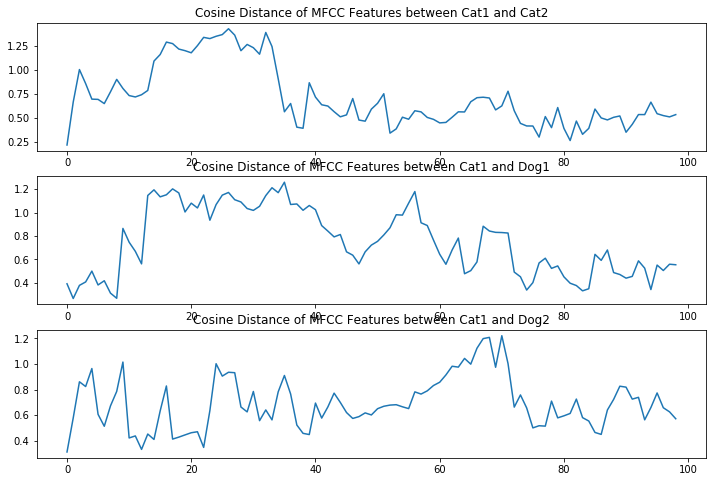

In [8]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

dist_cat2 = cosine_distance(mfcc_cat1, mfcc_cat2)
dist_dog1 = cosine_distance(mfcc_cat1, mfcc_dog1)
dist_dog2 = cosine_distance(mfcc_cat1, mfcc_dog2)

ax[0].plot(dist_cat2)
ax[0].set_title('Cosine Distance of MFCC Features between Cat1 and Cat2')
ax[1].plot(dist_dog1)
ax[1].set_title('Cosine Distance of MFCC Features between Cat1 and Dog1')
ax[2].plot(dist_dog2)
ax[2].set_title('Cosine Distance of MFCC Features between Cat1 and Dog2')

plt.show()

In [9]:
def euclidean_dist(feats_1, feats_2):
    dist = []
    for i in range(len(feats_1)):
        a = feats_1[i]
        b = feats_2[i]
        dist.append(np.linalg.norm(a-b))
    return dist
    

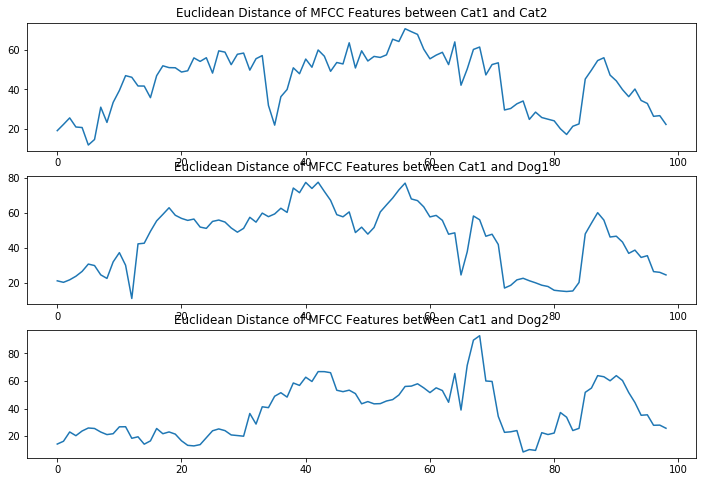

In [29]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

dist_cat2 = euclidean_dist(mfcc_cat1[:,:5], mfcc_cat2[:,:5])
dist_dog1 = euclidean_dist(mfcc_cat1[:,:5], mfcc_dog1[:,:5])
dist_dog2 = euclidean_dist(mfcc_cat1[:,:5], mfcc_dog2[:,:5])

ax[0].plot(dist_cat2)
ax[0].set_title('Euclidean Distance of MFCC Features between Cat1 and Cat2')
ax[1].plot(dist_dog1)
ax[1].set_title('Euclidean Distance of MFCC Features between Cat1 and Dog1')
ax[2].plot(dist_dog2)
ax[2].set_title('Euclidean Distance of MFCC Features between Cat1 and Dog2')

plt.show()